# Project 1: Three Flavors of Linear Regression
## William Chen

### This project involved implementing three types of linear regression: plain old linear regression, ridge, and lasso. The dataset I used for this compares normalized "feels like" temperature to the amount of total bike rentals in Porto, Portugal over a period of approximately 700 days.

In [17]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn import linear_model as lm

#The dataset was shuffled beforehand because the dataset was previously arranged chronologically
data = pd.read_csv('bikeshare_shuffled.csv')

#3 features that were relevant to the label were selected for linear regression
x_1 = data['atemp'].values
x_2 = data['hum'].values
x_3 = data['windspeed'].values
y = data['cnt'].values
N = len(y)

#x is already normalized in the dataset, so we'll just normalize y
for i in range(N):
        y[i] = (y[i]-np.mean(y))/np.std(y)
#Stacked the 3 separate columns together so as to be able to use it as 1 matrix 
x = np.column_stack((x_1, x_2, x_3))
#We divide the dataset into 3 sets, training is ~80%, validation is 10%, and testing is the last 10%
tr = int(round(N * 0.8))
val = int(round(N * 0.9))
x_tr = x[0:tr]
y_tr = y[0:tr]
x_val = x[tr:val]
y_val = y[tr:val]
x_test = x[val:N]
y_test = y[val:N]

## Part 1: Linear Regression

In [2]:
#First up is good ol' linear regression, and the model is trained using the training set
x_matrix = np.matrix(x)
u_x = x_matrix.mean(0)
u_y = np.mean(y_tr)

#The betas are calculated
b_1 = np.linalg.inv(x_tr.T @ x_tr) @ (x_tr.T @ y_tr)
b_0 = u_y - u_x @ b_1

#Predicted Y's are obtained by applying the beta values to a set of test data
y_hat = b_0 + x_test @ b_1

#Skip the validation data set because there are no weights to validate the data against

#The Mean Square Error is calculated
mse = np.sum(np.square(y_hat - y_test)) / len(y_test)

print("Mean Squared Error:", mse)

Mean Squared Error: 32.03610725509896


## Part 2: Ridge Regression 

In [3]:
#Now we conduct the same test but with the ridge regression. 
#The equation is similar, but with the inclusion of lambda as a weight

def ridge(x, y, lamb):
    lambdaI = lamb * np.eye(len(x.T))
    b = np.linalg.inv(x.T @ x - lambdaI) @ (x.T @ y)
    return b

def calc_mse(x, y, b_ridge):
    y_hat = x @ b_ridge
    mse = np.sum(np.square(y_hat - y)) / len(y)
    return mse
    
#First, find the minimum MSE based on a sample of lambdas and testing against the validation set, and the minimum MSE will determine the best lambda
lamb = np.linspace(0, 10, num = 1000)
mse = []

for lam in lamb:
    meansqerr = calc_mse(x_val, y_val, ridge(x_tr, y_tr, lam))
    mse.append(meansqerr)

mse_min = np.min(mse)

for i in range(1000):
    if (mse[i] == mse_min):
        min_ind = i
        
#Once the optimal lambda is obtained, now we train the model again and then test against the test set
mse = calc_mse(x_test, y_test, ridge(x_tr, y_tr, lamb[min_ind]))
#As expected, the mean squared error for ridge regression is lower than that of plain ol' linear regression
print("Most optimal lambda: ", lamb[min_ind])
print("Mean Squared Error:", mse)

Most optimal lambda:  6.476476476476477
Mean Squared Error: 31.838624821489454


## Lasso Regression

In [14]:
#We finally perform the same test but with lasso regression, and select a lambda much like in ridge regression
lamb = np.linspace(0.0001, 10, num = 1000)
mse = []

for lam in lamb:
    lr = Lasso(alpha = lam)
    lr.fit(x_tr, y_tr)
    y_hat_lasso = lr.predict(x_val)
    mse.append(np.sum((y_val - y_hat_lasso) ** 2) / len(x_val))

mse_min = np.min(mse)
for i in range(1000):
    if (mse[i] == mse_min):
        min_ind = i
#It would appear that there's a trend of lower values of lambda resulting in a lower MSE
lr = Lasso(alpha = lamb[min_ind])
lr.fit(x_tr, y_tr)
y_hat_lasso = lr.predict(x_test)
mse = np.sum((y_test - y_hat_lasso) ** 2) / len(x_test)
#This is reflected in the final test since the most optimal alpha is also the lowest in the range of lambas
#This indicates that the lasso may not have been a good fit for the data
#The mean squared error for Lasso regression is higher than linear regression but still lower than plain linear regression
print("Most optimal lambda: ", lamb[min_ind])
print("Mean Squared Error:", mse)

Most optimal lambda:  0.0001
Mean Squared Error: 32.01547550307946


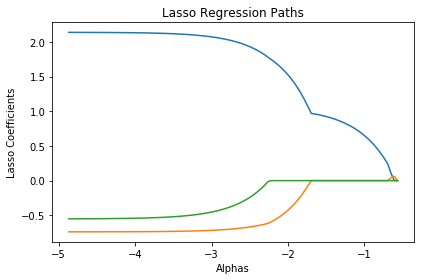

In [34]:
#This is just plotting the Lasso regression paths
alphas, coeffs, _ = lm.lasso_path(x_tr, y_tr, eps=5e-5)
alphas = np.log10(alphas)
for co in coeffs:
    ax = plt.plot(alphas, co.T)

plt.title("Lasso Regression Paths")
plt.ylabel('Lasso Coefficients')
plt.xlabel("Alphas")
plt.tight_layout()
